## Introduction:

**Multi-layer perceptron (MLP)** is one of the foundational models in machine learning. It consists of layers of interconnected neurons, where each neuron applies a linear transformation followed by a non-linear activation. By stacking multiple hidden layers, MLPs can approximate highly complex, non-linear functions. This makes them powerful tools for tasks such as image classification, natural language processing, and scientific data analysis.

Despite their apparent simplicity compared to modern architectures like transformers or convolutional networks, MLPs remain central to deep learning for several reasons:

_A. Theoretical importance_

MLPs are universal function approximators — with enough hidden units, they can represent any continuous function. They provide the mathematical foundation for more advanced architectures.

_B. Practical relevance_

Many real-world pipelines still rely on MLP components inside larger models (e.g., feed-forward layers in transformers). Their simplicity makes them ideal for controlled experiments and for teaching the fundamentals of neural network behavior.

_C. Experimental flexibility_

Because MLPs expose all the key knobs of neural networks — depth, width, initialization, learning rate schedules, batch size — they are perfect for studying how these factors interact and affect training dynamics.

The goal of this project is to systematically test how design and optimization choices affect the performance of MLPs. By varying architectural parameters (number of layers and neurons), initialization schemes, learning rate schedules, and batch sizes, we can map out how each factor influences:

- Final test accuracy (does the network generalize well?)
- Training efficiency (how long does it take to reach a given performance?)
- Stability of learning (does the network converge smoothly or struggle with noise/plateaus?)

This kind of controlled investigation is important because it bridges the gap between theory and practice. While many textbooks or papers assert which methods “should” work, only systematic testing on a real dataset shows the practical trade-offs. Understanding these trade-offs is not only key to building intuition for neural networks, but also to making informed decisions when scaling up to more advanced architectures.

## Set-Up

Below are the dependent methdos and repositories needed for the code to run, please download them! The second block within this subsection initializes the data (incase you want to apply this model to any other dataset) and prepares it for training while the third block initiates the evalution method used to collect data for graphing and analysis.

In [4]:
import nHnN_MLP as nMLP
import functions as fun
import time
import matplotlib.pyplot as plt
import numpy as np

In [5]:
route = 'data/TMNIST_data.csv'
#route = 'insert your route here' 
testAmount = 1000
scale = 255
results = 10
rem_axis = "names"


test_y,test_x,train_y,train_x, pixels,train_trials,results = nMLP.process_data(route, testAmount, scale, results,rem_axis=rem_axis)

# **Testing**

In this notebook file, you will be able to initiate your own training runs of the MLP model I implemented with python using numpy and pands. Within the different tabs below, different variables are changed within the MLP to allow for analysis of different independent variables! Feel free to tweak around and see what happens. If any error pops up within the code feel free to message me at steve.yin@duke.edu :D

## Neurons-Per-Layer

In a neural network, a **neuron** is the basic unit of computation. Each neuron takes in several inputs, multiplies them by weights, adds a bias, and then passes the result through an activation function. This process allows the neuron to decide how strongly it should "fire" in response to the input. Over many neurons and layers, the network can learn to recognize patterns and relationships in the data.

---
__**Why Neurons Matter**__
Neurons work together to transform raw data into meaningful features. A single neuron might only detect a simple pattern, but when combined in layers, they can represent very complex functions. This makes them powerful tools for tasks like image recognition, speech processing, or any kind of prediction problem.

---
__**What Happens When We Change the Number of Neurons?**__
The number of neurons in a layer directly affects the network’s capacity:

- **Too few neurons:** The model cannot capture enough patterns, leading to *underfitting*. It performs poorly on both training and test data.  
- **A balanced number of neurons:** The model has enough power to capture patterns without becoming too complex. This usually leads to the best generalization.  
- **Too many neurons:** The model may start to memorize training data, causing *overfitting*. Training becomes slower and test performance can actually decrease.

---
In short: increasing neurons increases the network’s ability to learn, but only up to a point. Beyond that, it can harm performance unless regularization or more data is used.


In [ ]:

#Define number of neurons
neurons = [2,4,8,10,16,32,64,128,256]

#Define data arrays
Ntest_accs = []
Ntotal_times = []
Nresults_dic = {}

#Collect Data
for N in neurons:
    print(f"neuron number:{N}") 
    test_acc, total_duration, training_accuracy, hundred_duration, epoch_time = nMLP.train_and_evaluate(H=2, N=N, train_x=train_x, train_y=train_y,test_x=test_x, test_y=test_y,pixels=pixels, results=10, iters=500, alpha=0.01)
    Ntest_accs.append(test_acc)
    Ntotal_times.append(total_duration)

    Nresults_dic[N] = {
        "acc": training_accuracy,
        "time": hundred_duration,
        "epoch_time": epoch_time
    }


neuron number:2
Iteration 0, Accuracy=0.0996
Iteration 100, Accuracy=0.0996
Iteration 200, Accuracy=0.0996
Iteration 300, Accuracy=0.0996
Iteration 400, Accuracy=0.0996
neuron number:4
Iteration 0, Accuracy=0.1015
Iteration 100, Accuracy=0.1048
Iteration 200, Accuracy=0.1140
Iteration 300, Accuracy=0.1068
Iteration 400, Accuracy=0.0841
neuron number:8
Iteration 0, Accuracy=0.1071
Iteration 100, Accuracy=0.1786
Iteration 200, Accuracy=0.2046
Iteration 300, Accuracy=0.2324
Iteration 400, Accuracy=0.2641
neuron number:10
Iteration 0, Accuracy=0.1103
Iteration 100, Accuracy=0.1694
Iteration 200, Accuracy=0.1970
Iteration 300, Accuracy=0.2466
Iteration 400, Accuracy=0.3132
neuron number:16
Iteration 0, Accuracy=0.0674
Iteration 100, Accuracy=0.2611
Iteration 200, Accuracy=0.4164
Iteration 300, Accuracy=0.5176
Iteration 400, Accuracy=0.5916
neuron number:32
Iteration 0, Accuracy=0.0469
Iteration 100, Accuracy=0.4429
Iteration 200, Accuracy=0.6591
Iteration 300, Accuracy=0.7497
Iteration 400,

#### Accuracy vs. Hidden Layer Width

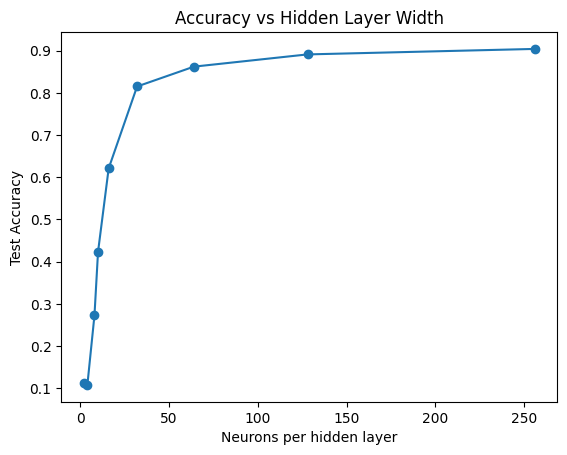

In [13]:
plt.plot(neurons, Ntest_accs, marker='o')
plt.xlabel("Neurons per hidden layer")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Hidden Layer Width")
plt.show()

Based on this graph we can see how as the number of neurons increase the accuracy of the model after training seems to increase as well. Theoretically, we can credit this to the neurons picking up more "characterstics" about the input so that it is better informed to determine the output. 

However, it is also clear that there is a great drop off in increase in accuracy the more neurons you have (seen by the decrease in slope). In essense, all models will have a diminishing returns effect on accuracy; however, the more complex your model, likely the later diminshing returns will come into play. 

#### Pareto Frontier

Text(0.5, 1.0, 'Accuracy vs Training Time (Pareto Frontier)')

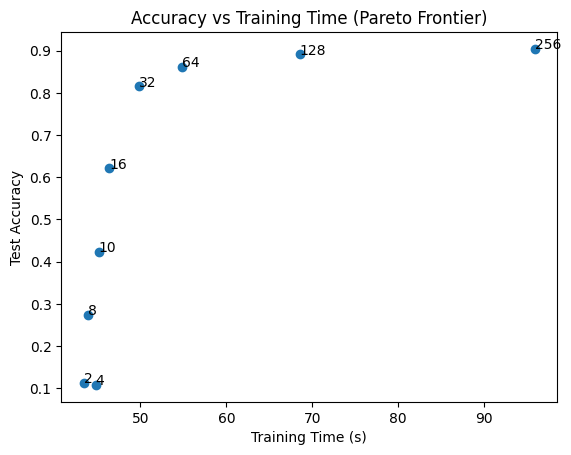

In [14]:
plt.scatter(Ntotal_times, Ntest_accs)
for i, N in enumerate(neurons):
    plt.text(Ntotal_times[i], Ntest_accs[i], f"{N}")



plt.xlabel("Training Time (s)")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Training Time (Pareto Frontier)")

We see a Pareto Frontier which compares the training time to test accuracies. Based on the graph we can see a clear correlation between the variables displayed. While more neurons deliver a higher accuracy, it also tends to slow the training time drastically. 

Here we discover the essence of setting up hyperparameters in MLPs. What number of neuron is best for my situation? Is the complexity worth the increased training time? Should I increase the number of epochs and decrease the number of neurons for a better result? etc. 

In the next section another layer of complexity is added to this question: increase neurons or layers?

## Hidden Layer Number

Hidden Layers in Neural Networks

In a neural network, a **hidden layer** is a layer of neurons placed between the input and output. Each hidden layer transforms the outputs of the previous layer into a new representation, allowing the network to capture more abstract and non-linear patterns in the data.

---

__**Why Hidden Layers Matter**__  
Hidden layers enable the network to build **hierarchical representations**. Early layers may detect simple features (like edges or textures), while deeper layers combine these into more complex concepts (like shapes, objects, or categories). Without hidden layers, a neural network reduces to a simple linear model with limited learning power.

---

__**What Happens When We Change the Number of Hidden Layers?**__  
The depth of a network changes how it learns:

- **Too few layers:** The model cannot represent complex relationships, often leading to *underfitting*.  
- **A balanced number of layers:** The network captures structure in the data effectively and generalizes well.  
- **Too many layers:** The model may become harder to train (vanishing gradients, overfitting) and require more computation, without guaranteed performance gains.

---

In short: increasing hidden layers makes the network more expressive, but deeper is not always better. A well-balanced depth allows the model to learn complex features efficiently without unnecessary complexity.


In [ ]:

#Define number of hidden layers
hidden_layers = [2,3,5,10,15]

#Define data arrays
Htest_accs = []
Htotal_times = []
Hresults_dic = {}

#Collect Data
for H in hidden_layers:
    print(f"number of layers:{H}")
    test_acc, total_duration,training_accuracy, hundred_duration, epoch_time = nMLP.train_and_evaluate(H=H, N=10, train_x=train_x, train_y=train_y,
                                                                                        test_x=test_x, test_y=test_y,
                                                                                        pixels=pixels, results=10, iters=500, alpha=0.01)
    Htest_accs.append(test_acc)
    Htotal_times.append(total_duration)
    Hresults_dic[H] = {
        "acc": training_accuracy,
        "time": hundred_duration
    }


number of layers:2
Iteration 0, Accuracy=0.1298
Iteration 100, Accuracy=0.1732
Iteration 200, Accuracy=0.2593
Iteration 300, Accuracy=0.3222
Iteration 400, Accuracy=0.4621
number of layers:3
Iteration 0, Accuracy=0.1140
Iteration 100, Accuracy=0.1231
Iteration 200, Accuracy=0.2090
Iteration 300, Accuracy=0.2411
Iteration 400, Accuracy=0.2437
number of layers:5
Iteration 0, Accuracy=0.1004
Iteration 100, Accuracy=0.1004
Iteration 200, Accuracy=0.1014
Iteration 300, Accuracy=0.1182
Iteration 400, Accuracy=0.1318
number of layers:10
Iteration 0, Accuracy=0.0998
Iteration 100, Accuracy=0.0998
Iteration 200, Accuracy=0.0998
Iteration 300, Accuracy=0.0998
Iteration 400, Accuracy=0.0998
number of layers:15
Iteration 0, Accuracy=0.1004
Iteration 100, Accuracy=0.1004
Iteration 200, Accuracy=0.1004
Iteration 300, Accuracy=0.1004
Iteration 400, Accuracy=0.1004


#### Accuracy vs Hidden Layer Depth

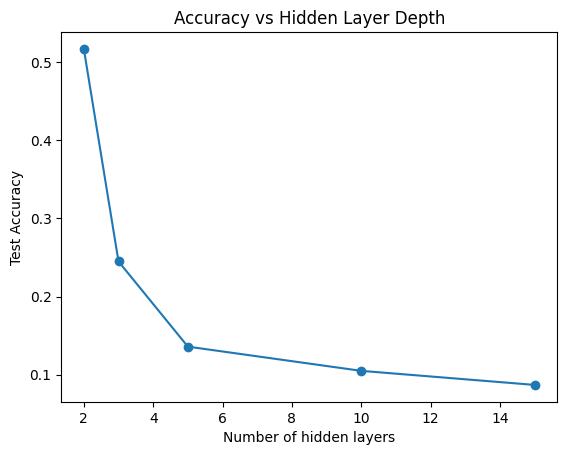

In [21]:
plt.plot(hidden_layers, Htest_accs, marker='o')
plt.xlabel("Number of hidden layers")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Hidden Layer Depth")
plt.show()

Here we see how the test accuracy is affected by different numbers of hidden layers. Different to the prior graph made by changing the number of neurons, the accuracy here seems to decrease as we increase the number of hidden layers.

Intuitively, we can understand this as "reading too much into the input". Hidden layers different hirearchical attributes (while neurons can be understood as representing the depths of those attributes). When too many hidden layers are chosen for the particular instance, the model may start learning "false" information that can lead to a deviation in accuracy. 

#### Pareto Frontier

Text(0.5, 1.0, 'Accuracy vs Training Time (Pareto Frontier)')

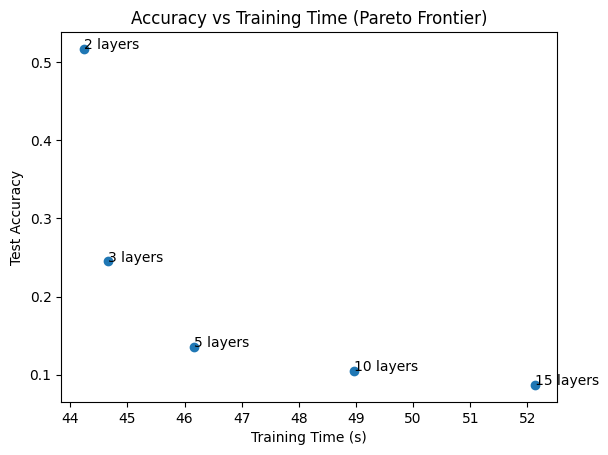

In [23]:
plt.scatter(Htotal_times, Htest_accs)
for i, H in enumerate(hidden_layers):
    plt.text(Htotal_times[i], Htest_accs[i], f"{H} layers")

plt.xlabel("Training Time (s)")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Training Time (Pareto Frontier)")

The Accuracy vs. Training Time chart here once again shows how as layers increase, seemingly both accuracy and training time decrease. While you may think: "Oh, then I'll just use a less layers as possible!"; don't be so fast to rush to conclusions.

As described above, even though in THIS instance (digit recognition) the 2 layers proved to yield the highest accuracy, there are many reasons in other situations to have more hidden layers. Conceptually, the complexity of our input is not as high as many other situations, therefore too many layers may lead to "over-thinking" the input. Mathmetically, too many layers may lead to a vanishing gradient, a term given to when the gradient—after being passed through too many layers—lose information about the loss function. 

Therefore, the main consideration when choosing the number of hidden layers is the dimension of complexity of your input. Then, subsequently, the neuron count can be calculated based on the depth of complexity and required training time. 

## Different Initializations

In a neural network, **initialization functions** determine how the weights of each layer are set before training begins. Proper initialization is critical because it directly affects how signals propagate forward and how gradients flow backward. Good initialization helps the network train faster and more reliably, while poor initialization can lead to slow convergence or even training failure.  

---

**Why Initialization Matters**  
When training begins, the network relies on random starting weights. If these weights are too small, signals may vanish as they pass through layers; if too large, they may explode. Both cases make gradient descent unstable. Initialization functions aim to set the weights in a way that keeps activations and gradients in a healthy range across the network, enabling smooth learning from the start.  

---

**Common Initialization Methods**  

- **Uniform Initialization**  
  Weights are sampled uniformly from a small range (e.g., \([-0.5, 0.5]\)).  
  - **Pros:** Simple, easy to implement.  
  - **Cons:** Does not scale with the size of the layer; may cause vanishing or exploding activations in deeper networks.  

---

- **Xavier (Glorot) Initialization**  
  Designed for **tanh** or **sigmoid** activations. Weights are drawn from a distribution bounded by:  

  \[
  \text{limit} = \sqrt{\frac{6}{n_\text{in} + n_\text{out}}}
  \]

  where \(n_\text{in}\) = number of input neurons and \(n_\text{out}\) = number of output neurons.  
  - **Pros:** Balances variance of activations and gradients across layers.  
  - **Cons:** Works best with sigmoid/tanh; not ideal for ReLU.  

---

- **He Initialization**  
  Tailored for **ReLU** activations. Weights are drawn from a normal distribution with variance:  

  \[
  \sigma^2 = \frac{2}{n_\text{in}}
  \]

  or equivalently:  

  \[
  W \sim \mathcal{N}\left(0, \sqrt{\frac{2}{n_\text{in}}}\right)
  \]

  - **Pros:** Maintains activation scale under ReLU by compensating for inactive neurons.  
  - **Cons:** Specifically optimized for ReLU; less effective with sigmoid/tanh.  

---

**Summary Table**  

| Method        | Formula                                                                 | Best For            | Pros                                           | Cons                                         |
|---------------|-------------------------------------------------------------------------|---------------------|-----------------------------------------------|----------------------------------------------|
| **Uniform**   | \(W \sim U[-0.5, 0.5]\)                                                 | Shallow networks    | Simple to use                                 | Not scaled to layer size; poor for deep nets |
| **Xavier**    | \(W \sim U\left[-\sqrt{\tfrac{6}{n_\text{in}+n_\text{out}}}, \sqrt{\tfrac{6}{n_\text{in}+n_\text{out}}}\right]\) | Sigmoid / Tanh      | Balances variance across layers               | Not ideal for ReLU activations               |
| **He**        | \(W \sim \mathcal{N}\left(0, \sqrt{\tfrac{2}{n_\text{in}}}\right)\)     | ReLU / Variants     | Keeps activations stable in deep ReLU nets    | Less effective with sigmoid/tanh             |

---

In short: **Uniform** is basic, **Xavier** is designed for sigmoid/tanh, and **He** is the go-to for ReLU.  


In [ ]:

#Define number of neurons
initialization_function = ["uniform","xavier","he"]

#Define data arrays
Itest_accs = []
Itotal_times = []
Iresults_dic = {}

#Collect Data
for I in initialization_function:
    print(f"initailization function:{I}") 
    test_acc, total_duration, training_accuracy, hundred_duration, epoch_time = nMLP.train_and_evaluate(H=2, N=10, train_x=train_x, train_y=train_y,test_x=test_x, test_y=test_y,pixels=pixels, results=10, iters=1000, alpha=0.05, act = I)
    Itest_accs.append(test_acc)
    Itotal_times.append(total_duration)

    initial_acc = training_accuracy[0]
    final_acc   = training_accuracy[-1]

    Iresults_dic[I] = {
        "acc": training_accuracy,
        "time": hundred_duration,
        "initial": initial_acc,
        "final": final_acc
    }


initailization function:uniform
Iteration 0, Accuracy=0.0438
Iteration 100, Accuracy=0.4204
Iteration 200, Accuracy=0.6687
Iteration 300, Accuracy=0.8131
Iteration 400, Accuracy=0.8652
Iteration 500, Accuracy=0.8858
Iteration 600, Accuracy=0.9002
Iteration 700, Accuracy=0.9099
Iteration 800, Accuracy=0.9171
Iteration 900, Accuracy=0.9228
initailization function:xavier
Iteration 0, Accuracy=0.1057
Iteration 100, Accuracy=0.5606
Iteration 200, Accuracy=0.8894
Iteration 300, Accuracy=0.9192
Iteration 400, Accuracy=0.9297
Iteration 500, Accuracy=0.9370
Iteration 600, Accuracy=0.9422
Iteration 700, Accuracy=0.9455
Iteration 800, Accuracy=0.9488
Iteration 900, Accuracy=0.9508
initailization function:he
Iteration 0, Accuracy=0.1142
Iteration 100, Accuracy=0.6466
Iteration 200, Accuracy=0.6365
Iteration 300, Accuracy=0.6675
Iteration 400, Accuracy=0.8735
Iteration 500, Accuracy=0.9086
Iteration 600, Accuracy=0.9243
Iteration 700, Accuracy=0.9330
Iteration 800, Accuracy=0.9386
Iteration 900, Ac

#### Initial and Final Accuracies of Different Initialization Functions

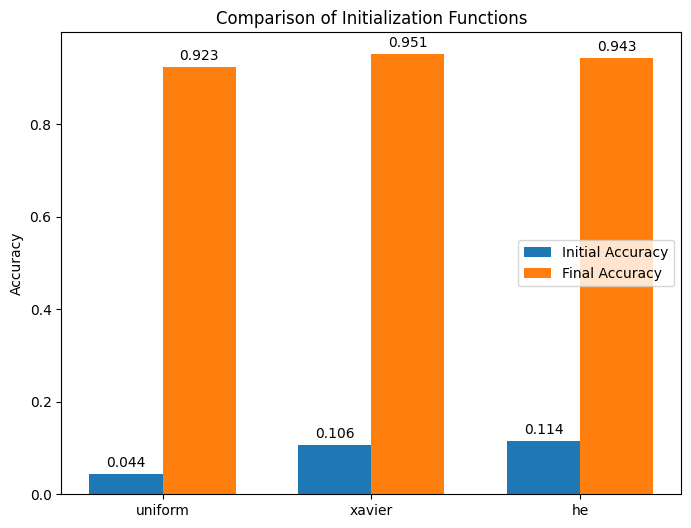

In [25]:
labels = list(Iresults_dic.keys())
initial_accs = [Iresults_dic[k]["initial"] for k in labels]
final_accs   = [Iresults_dic[k]["final"] for k in labels]

x = np.arange(len(labels))  # label locations
width = 0.35

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, initial_accs, width, label="Initial Accuracy")
rects2 = ax.bar(x + width/2, final_accs, width, label="Final Accuracy")

ax.set_ylabel("Accuracy")
ax.set_title("Comparison of Initialization Functions")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add bar labels
ax.bar_label(rects1, fmt="%.3f", padding=3)
ax.bar_label(rects2, fmt="%.3f", padding=3)

plt.show()

This is just a baseline comparison showing the difference between initial and final accuracy of the different initialization functions. This gives no real significant information except for the fact that there is no real accuracy advantage to different initializations; therefore, the difference in initialization efficiency might be in training speeds. 

#### Accuracy vs. Normalized Training Time

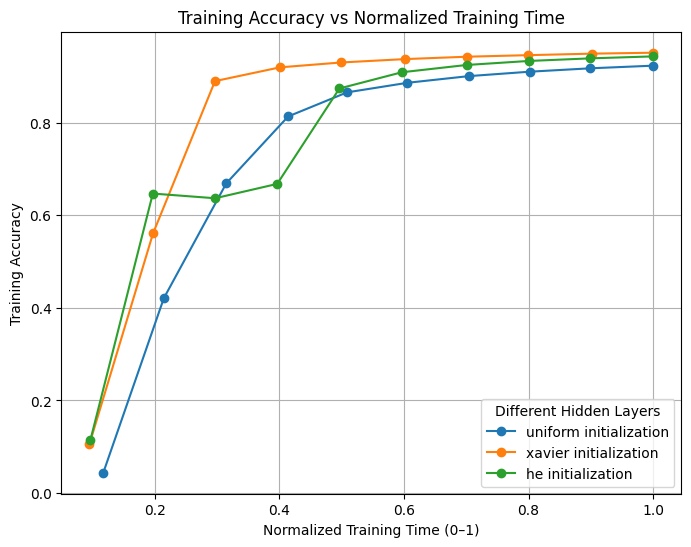

In [26]:
plt.figure(figsize=(8,6))

for i, I in enumerate(Iresults_dic):
    times = np.array(Iresults_dic[I]["time"])
    accs = np.array(Iresults_dic[I]["acc"])
    
    cumulative_times = np.cumsum(times)
    norm_times = cumulative_times / cumulative_times[-1]
    
    plt.plot(norm_times, accs, marker='o', label=f"{I} initialization")

plt.xlabel("Normalized Training Time (0–1)")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Normalized Training Time")
plt.legend(title="Different Hidden Layers")
plt.grid(True)
plt.show()

Here we see a normalized training time comparison between the different initialization functions. A couple observations are: 
1) xavier initialization achieves the highest accuracy in the lowest number of epochs. This is because xavier balances input/output variance, so the network starts in a "well-conditioned" state. This lets gradient descent make useful progress faster, often giving the fastest convergence in early epochs.
2) he has the highest initial increase rate. This is likely due to how the activation funciton compensates for the particular gradient loss experienced by the ReLU funcitons. 
3) uniform has the smoothest curve. This makes sense as the variables are uniformly distributed, therefore changes in the parameters would change uniformly instead of more sporadicly like the non-uniform funcitons. 

#### Pareto Frontier

Text(0.5, 1.0, 'Accuracy vs Training Time (Pareto Frontier)')

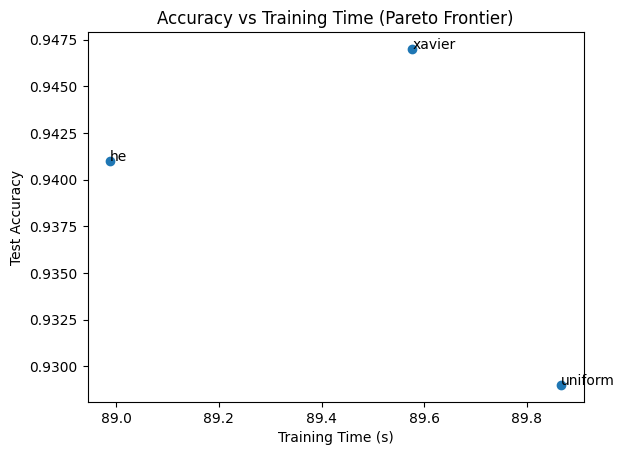

In [27]:
plt.scatter(Itotal_times, Itest_accs)
for i, I in enumerate(initialization_function):
    plt.text(Itotal_times[i],Itest_accs[i], f"{I}")


plt.xlabel("Training Time (s)")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Training Time (Pareto Frontier)")

Finally here, we see why he is preferred for MLPs. While the final accuracies stay relatively similar, the training time between the he and xavier and uniform is respectively around 0.6 and 0.9 which doesn't seem very large, but be reminded our sample size and iterations is quite small. If we were to scale our model to have a larger sample size or more epochs we would have a much larger gap. 

Therefore, when choosing initialization funcitons, the main consideration to have in mind is what best fits the non-linear activation function chosen for the neurons, and the number of hidden layers within the array (cause xavier takes the shortest number of epochs to reach the highest accuracy).

## Different Learning Rate Schedules

In a neural network, the **learning rate** controls how much weights are updated during training. It acts as the step size for gradient descent—too small leads to slow learning, while too large can cause unstable or divergent behavior.  

---

**Why Learning Rate Matters**  
The learning rate shapes how fast and how well a model learns:  
- **Too small:** Converges slowly, may get stuck in poor minima.  
- **Well-chosen:** Balances speed and stability, reaching good accuracy efficiently.  
- **Too large:** Loss may oscillate or explode.  

---

**Common Schedules**  

- **Fixed:** Constant rate; simple but often suboptimal.  
- **Step Decay:** Reduce rate every *k* epochs; effective for staged refinement.  
- **Exponential Decay:** Smooth decrease:  
  \[
  \alpha_t = \alpha_0 \cdot \gamma^t
  \]  
- **Cosine Annealing:** Gradual cosine curve:  
  \[
  \alpha_t = \alpha_0 \cdot \tfrac{1}{2}\left(1 + \cos\!\left(\tfrac{\pi t}{T}\right)\right)
  \]  

---

**Summary Table**  

| Schedule       | Formula                                               | Pros                   | Cons                        |
|----------------|-------------------------------------------------------|------------------------|-----------------------------|
| **Fixed**      | \(\alpha_t = \alpha_0\)                               | Simple                 | Too slow or unstable        |
| **Step**       | \(\alpha_t = \alpha_0 \cdot \gamma^{\lfloor t/k \rfloor}\) | Good staged control     | Sharp drops, tuning needed  |
| **Exponential**| \(\alpha_t = \alpha_0 \cdot \gamma^t\)                | Smooth decay           | May shrink too fast         |
| **Cosine**     | \(\alpha_t = \alpha_0 \cdot \tfrac{1}{2}(1 + \cos(\pi t/T))\) | Stable, good generalization | Requires total epochs set |

---

In short: **Fixed** is simplest, **Step/Exponential** refine training, and **Cosine** provides smooth convergence with good generalization.  


In [5]:

#Define number of neurons
schedules = ["fixed","step","exp","cosine"]

#Define data arrays
Stest_accs = []
Stotal_times = []
Sresults_dic = {}

#Collect Data
for S in schedules:
    print(f"schedule type:{S}")
    test_acc, total_duration,training_accuracy, hundred_duration, epoch_time = nMLP.train_and_evaluate(H=2, N=10, train_x=train_x, train_y=train_y,
                                                                                        test_x=test_x, test_y=test_y,
                                                                                        pixels=pixels, results=10, iters=1000, alpha=0.1,schedule = S)
    Stest_accs.append(test_acc)
    Stotal_times.append(total_duration)
    Sresults_dic[S] = {
        "acc": training_accuracy,
        "time": hundred_duration
    }


schedule type:fixed
Iteration 0, Accuracy=0.1098
Iteration 100, Accuracy=0.6749
Iteration 200, Accuracy=0.8672
Iteration 300, Accuracy=0.9016
Iteration 400, Accuracy=0.9163
Iteration 500, Accuracy=0.9247
Iteration 600, Accuracy=0.9308
Iteration 700, Accuracy=0.9352
Iteration 800, Accuracy=0.9384
Iteration 900, Accuracy=0.9417
schedule type:step
Iteration 0, Accuracy=0.1301
Iteration 100, Accuracy=0.6672
Iteration 200, Accuracy=0.8050
Iteration 300, Accuracy=0.8348
Iteration 400, Accuracy=0.8461
Iteration 500, Accuracy=0.8512
Iteration 600, Accuracy=0.8533
Iteration 700, Accuracy=0.8542
Iteration 800, Accuracy=0.8547
Iteration 900, Accuracy=0.8550
schedule type:exp
Iteration 0, Accuracy=0.1041
Iteration 100, Accuracy=0.5817
Iteration 200, Accuracy=0.7123
Iteration 300, Accuracy=0.7394
Iteration 400, Accuracy=0.7471
Iteration 500, Accuracy=0.7498
Iteration 600, Accuracy=0.7507
Iteration 700, Accuracy=0.7510
Iteration 800, Accuracy=0.7511
Iteration 900, Accuracy=0.7512
schedule type:cosin

#### Training Accuracy Over Epochs of Different Schedules

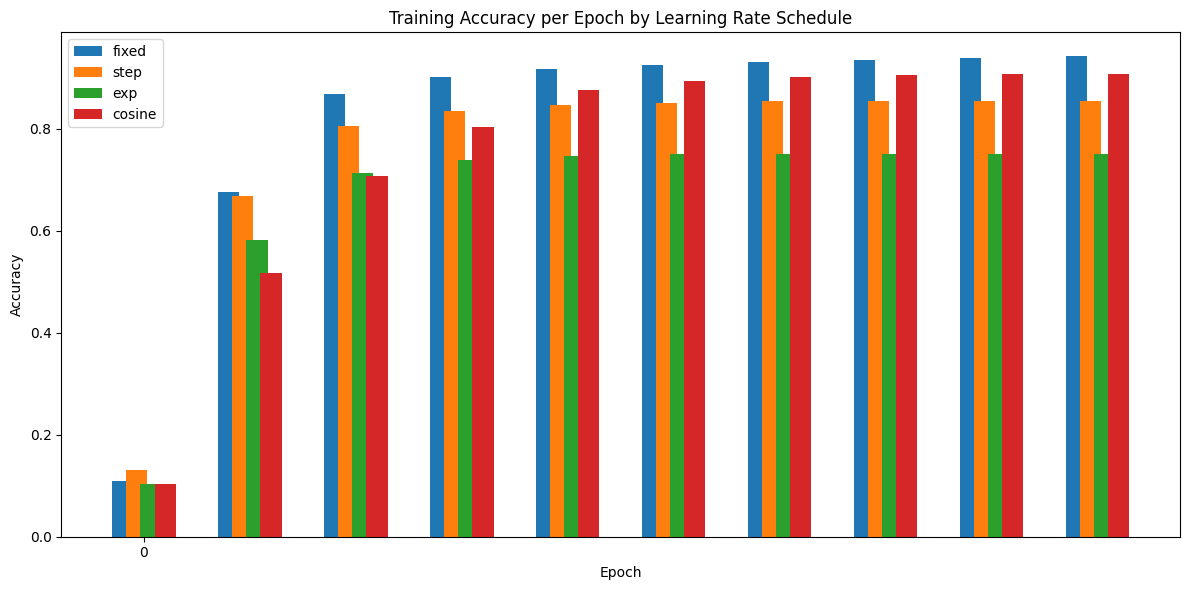

In [6]:
epochs = len(next(iter(Sresults_dic.values()))["acc"])  # number of epochs
x = np.arange(epochs)

# bar width
width = 0.2  
offsets = np.linspace(-width, width, len(Sresults_dic))  # spacing schedules

plt.figure(figsize=(12, 6))

for i, sched in enumerate(schedules):
    acc_history = Sresults_dic[sched]["acc"]
    plt.bar(x + offsets[i], acc_history, width, label=sched)

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy per Epoch by Learning Rate Schedule")
plt.xticks(np.arange(0, epochs, step=50))  # fewer ticks if too crowded
plt.legend()
plt.tight_layout()
plt.show()

Across epochs, fixed leads with the strongest accuracy at every stage. Cosine gains strength in later epochs, eventually overtaking step and stabilizing close to fixed. Step performs well early but stalls at a mid-level plateau, while exponential remains consistently behind the others.

#### Training Accuracy Vs. Normalized Training Time

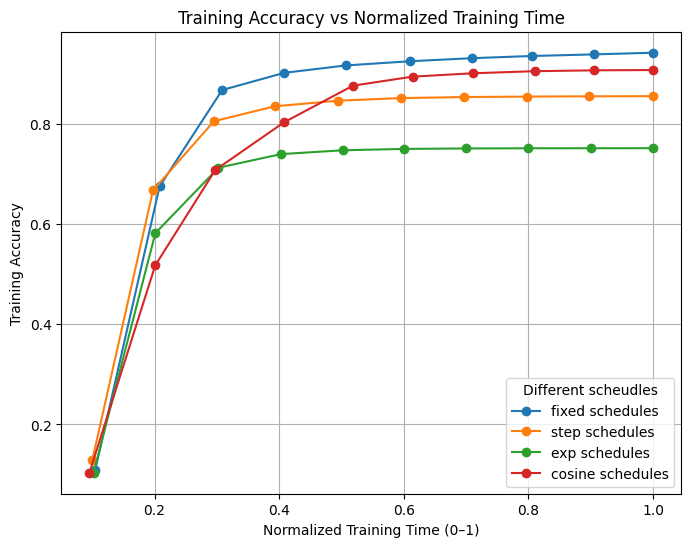

In [7]:
plt.figure(figsize=(8,6))

for i, S in enumerate(Sresults_dic):
    times = np.array(Sresults_dic[S]["time"])
    accs = np.array(Sresults_dic[S]["acc"])
    
    cumulative_times = np.cumsum(times)
    norm_times = cumulative_times / cumulative_times[-1]
    
    plt.plot(norm_times, accs, marker='o', label=f"{S} schedules")

plt.xlabel("Normalized Training Time (0–1)")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Normalized Training Time")
plt.legend(title="Different scheudles")
plt.grid(True)
plt.show()

Fixed consistently stays on top throughout training, converging quickly and maintaining the highest accuracy. Cosine catches up later, nearly matching fixed’s performance by the end. Step improves steadily but plateaus lower, while exponential remains the slowest and weakest, converging to the lowest training accuracy.

#### Pareto Frontier

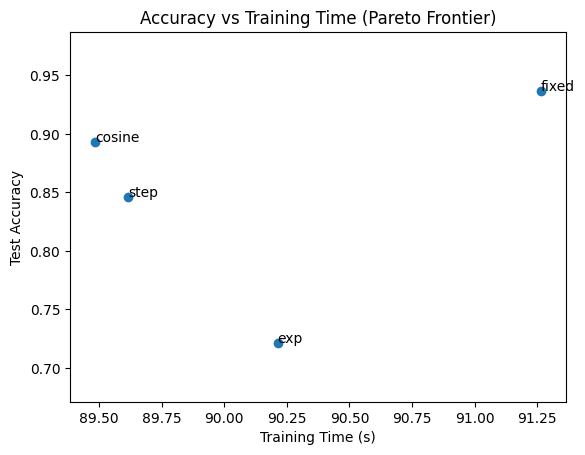

In [12]:
plt.scatter(Stotal_times, Stest_accs)
for i, S in enumerate(schedules):
    plt.text(Stotal_times[i], Stest_accs[i], f"{S}")


plt.ylim(min(Stest_accs) - 0.05, max(Stest_accs) + 0.05)
plt.xlim(min(Stotal_times) - 0.1, max(Stotal_times) + 0.1)

plt.xlabel("Training Time (s)")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Training Time (Pareto Frontier)")
plt.show()

The fixed schedule achieves the highest test accuracy but at the cost of the longest training time. Cosine comes close in accuracy while being noticeably faster, making it more efficient overall. Step decay delivers moderate results in both speed and accuracy, while exponential decay decays too aggressively, producing the weakest accuracy despite similar runtimes.

## Diffferent Batch Sizes

In a neural network, the **batch size** determines how many training examples are processed together before the model updates its weights. It plays a key role in balancing computational efficiency with the stability and quality of gradient estimates.  

Small batches produce noisy gradients, which can make training less stable but often improve generalization and allow the optimizer to explore the loss landscape more effectively. Large batches, on the other hand, yield smooth and accurate gradients that are efficient for hardware utilization, but they can converge to sharp minima and may generalize poorly despite achieving high training accuracy.  

Most modern deep learning uses mini-batch training, which strikes a balance between the two extremes. By processing a moderate number of samples per update, mini-batches provide efficient training while maintaining good generalization, making them the standard choice in practice.  

In short: **small batches** are noisy but generalize well, **large batches** are efficient but risk overfitting, and **mini-batches** offer the best compromise.  


In [ ]:
#Define number of neurons
batch_sizes = [32,64,128,256,None]

#Define data arrays
Btest_accs = []
Btotal_times = []
Bresults_dic = {}

#Collect Data
for B in batch_sizes:
    print(f"batch size:{B}") 
    test_acc, total_duration, training_accuracy, hundred_duration, epoch_time = nMLP.train_and_evaluate(H=2, N=10, train_x=train_x, train_y=train_y,test_x=test_x, test_y=test_y,pixels=pixels, results=10, iters=1000, alpha=0.01,batch_size=B)
    Btest_accs.append(test_acc)
    Btotal_times.append(total_duration)

    Bresults_dic[B] = {
        "acc": training_accuracy,
        "time": hundred_duration,
        "epoch time": epoch_time
    }


batch size:32
Iteration 0, Accuracy=0.6947
Iteration 100, Accuracy=0.9746
Iteration 200, Accuracy=0.9798
Iteration 300, Accuracy=0.9866
Iteration 400, Accuracy=0.9898
Iteration 500, Accuracy=0.9915
Iteration 600, Accuracy=0.9938
Iteration 700, Accuracy=0.9957
Iteration 800, Accuracy=0.9973
Iteration 900, Accuracy=0.9982
batch size:64
Iteration 0, Accuracy=0.5012
Iteration 100, Accuracy=0.9678
Iteration 200, Accuracy=0.9757
Iteration 300, Accuracy=0.9798
Iteration 400, Accuracy=0.9813
Iteration 500, Accuracy=0.9842
Iteration 600, Accuracy=0.9866
Iteration 700, Accuracy=0.9883
Iteration 800, Accuracy=0.9900
Iteration 900, Accuracy=0.9911
batch size:128
Iteration 0, Accuracy=0.1622
Iteration 100, Accuracy=0.9548
Iteration 200, Accuracy=0.9657
Iteration 300, Accuracy=0.9706
Iteration 400, Accuracy=0.9745
Iteration 500, Accuracy=0.9772
Iteration 600, Accuracy=0.9790
Iteration 700, Accuracy=0.9811
Iteration 800, Accuracy=0.9826
Iteration 900, Accuracy=0.9845
batch size:256
Iteration 0, Accur

#### Accuracy/Training Time vs. Batch Size

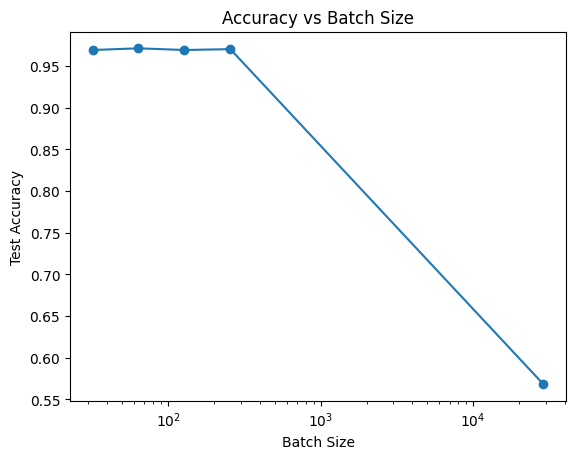

In [13]:
num_samples = train_x.shape[1]
sizes = [b if b is not None else num_samples for b in batch_sizes]

plt.plot(sizes, Btest_accs, marker='o')
plt.xlabel("Batch Size")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Batch Size")
plt.xscale("log")  # optional, makes spacing cleaner
plt.show()


Accuracy remains stable and near its maximum across small and medium batch sizes (32–256). Once the batch size becomes very large (full-batch), test accuracy drops steeply, highlighting the risk of poor generalization when gradients are averaged over too many samples.

#### Training Time per Epoch vs Epoch

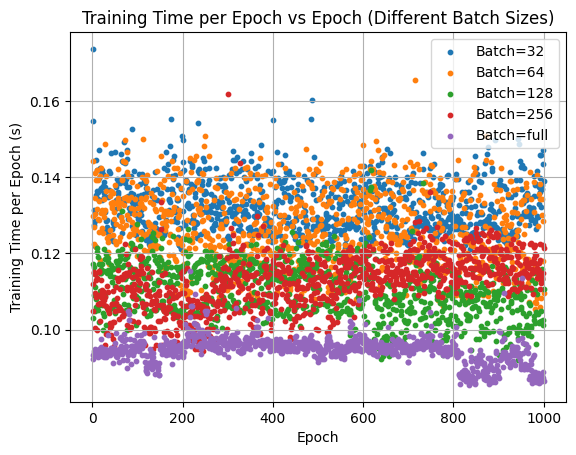

In [15]:
for B in batch_sizes:
    epoch_times = Bresults_dic[B]["epoch time"]  # list of per-epoch durations
    epochs = np.arange(1, len(epoch_times) + 1)  # epoch indices
    label = B if B is not None else "full"
    plt.scatter(epochs, epoch_times, s=10, label=f"Batch={label}")  

plt.xlabel("Epoch")
plt.ylabel("Training Time per Epoch (s)")
plt.title("Training Time per Epoch vs Epoch (Different Batch Sizes)")
plt.legend()
plt.grid(True)
plt.show()

Per-epoch runtime decreases as batch size increases. Full-batch training is the fastest per epoch, followed by large mini-batches like 256 and 128. Smaller batches like 32 and 64 take noticeably longer per epoch due to more weight updates. The scatter shows consistent trends across epochs without major outliers.

#### Pareto Frontier

Text(0.5, 1.0, 'Accuracy vs Training Time (Pareto Frontier)')

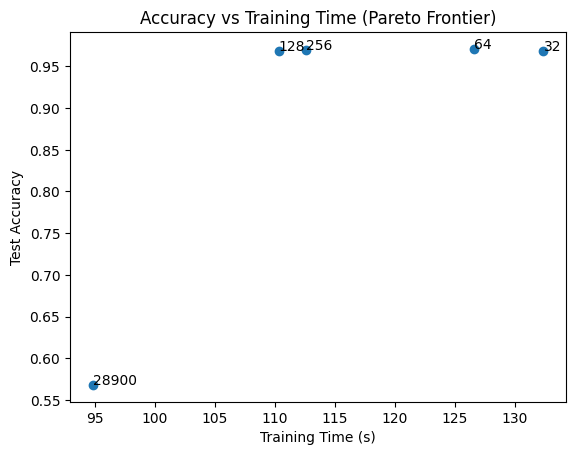

In [17]:

num_samples = train_x.shape[1]
labels = [b if b is not None else num_samples for b in batch_sizes]

plt.scatter(Btotal_times, Btest_accs)
for i, B in enumerate(labels):
    plt.text(Btotal_times[i], Btest_accs[i], f"{B}")



plt.xlabel("Training Time (s)")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Training Time (Pareto Frontier)")

Mini-batches of size 32–256 all achieve similarly high test accuracy, with 128 and 256 offering the best tradeoff between accuracy and shorter training times. The full-batch setting is fastest per epoch overall, but its test accuracy collapses, showing that very large batches harm generalization.

# **Conclusion**

We systematically explored how **neurons per layer, hidden layer depth, initialization schemes, learning rate schedules, and batch size** affect neural network performance. By combining graphs and targeted tables, we highlight both empirical findings and the theory behind them.

---

##### 1. Neurons per Hidden Layer   

- Accuracy climbs steeply from **2 → 64 neurons**, reflecting the increased representational power of wider layers.  
- Beyond ~128 neurons, accuracy plateaus near 90%, showing **diminishing returns**.  
- Wider networks also increase runtime due to heavier matrix multiplications, but without noticeable accuracy gain.  

**Takeaway:** Width helps only up to a point. 64–128 neurons is the sweet spot for this dataset.  

---

##### 2. Hidden Layer Depth  

- Accuracy **decreased** as depth increased beyond 2–3 layers.  
- Networks with 10+ layers nearly collapsed to random guessing.  
- Training times grew slightly with depth, but poor generalization was the dominant effect.  

**Takeaway:** More depth without architectural aids (residuals, normalization) makes MLPs harder to train. For this task, 2–3 layers are optimal.  

---

##### 3. Initialization Functions  
- **Uniform:** Converged slowly, lowest final accuracy.  
- **Xavier:** Achieved the **fastest and highest accuracy**, keeping activations balanced.  
- **He:** Nearly matched Xavier, and is better suited for ReLU activations due to its variance scaling.  

Summary: 
| Method   | Strength                         | Weakness                  |
|----------|----------------------------------|---------------------------|
| Uniform  | Simple, works in shallow nets    | Unstable in deeper nets   |
| Xavier   | Fast convergence, high accuracy  | Best for tanh/sigmoid     |
| He       | Stable with ReLU, strong accuracy| Slightly slower than Xavier|

**Takeaway:** Initialization sets the stage for training. Xavier/He clearly outperform uniform.  

---

##### 4. Learning Rate Schedules  

- **Fixed:** Highest accuracy overall, but required more time.  
- **Cosine Annealing:** The best balance — fast learning early, smooth decay later, and strong generalization.  
- **Step Decay:** Reasonably effective, but abrupt drops caused plateauing.  
- **Exponential:** Consistently underperformed, decaying too quickly.  

📌 **Takeaway:** Cosine schedules are most practical, striking the right balance between efficiency and accuracy. Fixed rates are strong but inefficient.  

---

##### 5. Batch Size  
- **Small batches (32–64):** Slower, but gradients were noisy enough to encourage generalization.  
- **Medium batches (128–256):** Best compromise — efficient and accurate.  
- **Full batch:** Fastest per epoch, but collapsed accuracy (~55%). Smooth gradients converged to sharp minima that don’t generalize.  

**Takeaway:** Mini-batches of 128–256 consistently gave the best efficiency and generalization.  

---

##### Final Takeaways  

- **Width:** Accuracy improves with neurons up to ~128, then saturates.  
- **Depth:** More than 2–3 layers hurts training without architectural tricks.  
- **Initialization:** Xavier and He outperform uniform by preserving activation variance.  
- **Learning Rate:** Cosine annealing is the most effective schedule.  
- **Batch Size:** Medium mini-batches (128–256) provide the best tradeoff between runtime and accuracy.  

**Best overall configuration:**  
- 2–3 hidden layers  
- 64–128 neurons per layer  
- He initialization (with ReLU)  
- Cosine learning rate schedule  
- Batch size of 128–256  

This configuration consistently yielded **high accuracy, stable convergence, and efficient runtime**, aligning with real-world deep learning best practices.  
